In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data = pd.read_csv('../data/data_limpia.csv', index_col= None)

In [3]:
data.head()

,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup,AgeCat,new_weight,TAS,TAD,PP
0,2,168,62.0,1,1,0,0,1,0,50,21.97,Peso normal,40-60,"[50, 60)",62.0,110.0,80.0,30.0
1,1,156,85.0,3,1,0,0,1,1,55,34.93,Obesidad,40-60,"[50, 60)",85.0,140.0,90.0,50.0
2,1,165,64.0,3,1,0,0,0,1,51,23.51,Peso normal,40-60,"[50, 60)",64.0,130.0,70.0,60.0
3,2,169,82.0,1,1,0,0,1,1,48,28.71,Sobrepeso,40-60,"[40, 50)",82.0,150.0,100.0,50.0
4,1,156,56.0,1,1,0,0,0,0,47,23.01,Peso normal,40-60,"[40, 50)",56.0,100.0,60.0,40.0


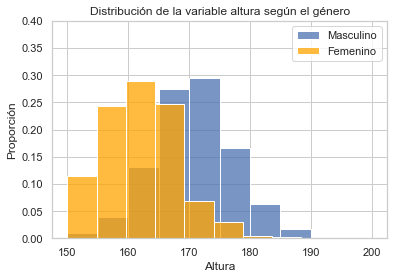

In [4]:
sns.set(style="darkgrid")

sns.set_style("whitegrid")
sns.set_context("notebook")

data_male = data[data.gender == 2]
data_male_height= data_male.height


sns.histplot(data_male_height,  kde=False, bins = 10, label='male', stat = "probability")

data_fem = data[data.gender == 1]
data_fem_height = data_fem.height
sns.histplot(data_fem_height,  kde=False, label='female', bins = 10, color = 'orange', stat = "probability")

plt.xlabel("height")

# Add title

plt.xlabel("Altura")
plt.ylabel("Proporción")
plt.title("Distribución de la variable altura según el género")
plt.legend(["Masculino", "Femenino"])
plt.ylim((0, 0.4))

plt.show()

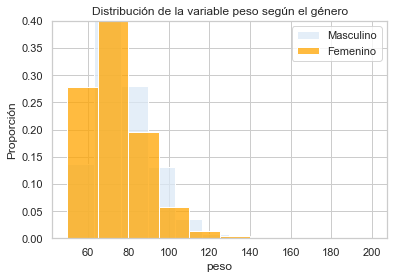

In [14]:
sns.set_style("whitegrid")
sns.set_context("notebook")

data_male = data[data.gender == 2]
data_male_height= data_male.new_weight


sns.histplot(data_male_height,  kde=False, bins = 10, label='male', stat = "probability")

data_fem = data[data.gender == 1]
data_fem_height = data_fem.new_weight
sns.histplot(data_fem_height,  kde=False, label='female', bins = 10, color = 'orange', stat = "probability")

plt.xlabel("weight")

# Add title

plt.xlabel("peso")
plt.ylabel("Proporción")
plt.title("Distribución de la variable peso según el género")
plt.legend(["Masculino", "Femenino"])
plt.ylim((0, 0.4))

plt.show()

Text(0.5, 1.0, 'Cantidad de personas según BMI y género')

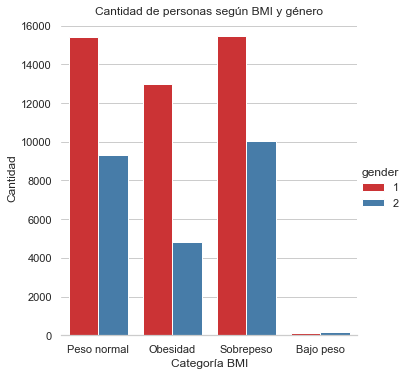

In [39]:
g = sns.catplot(x="BMICat",
                kind="count",
                data=data,
               palette="Set1", hue= 'gender')


g.despine(left=True)
g.set_axis_labels("Categoría BMI", "Cantidad")
plt.title("Cantidad de personas según BMI y género")


Text(0.5, 1.0, 'Categorías edad según género')

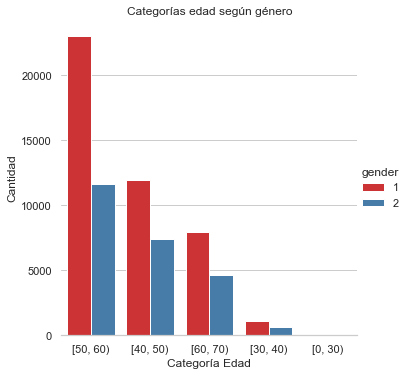

In [33]:
g = sns.catplot(x="AgeCat",
                kind="count",
                data=data,
               palette="Set1", hue= 'gender')


g.despine(left=True)
g.set_axis_labels("Categoría Edad", "Cantidad")
plt.title("Categorías edad según género")

[Text(0.5, 0, 'Categorías BMI')]

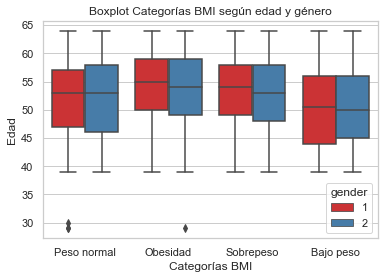

In [35]:
ax = sns.boxplot(x="BMICat", y="AgeinYr", data=data, hue = 'gender', palette = "Set1")
plt.title("Boxplot Categorías BMI según edad y género")
ax.set(ylabel="Edad")
ax.set(xlabel="Categorías BMI")


[Text(0.5, 0, 'Categorías Colesterol')]

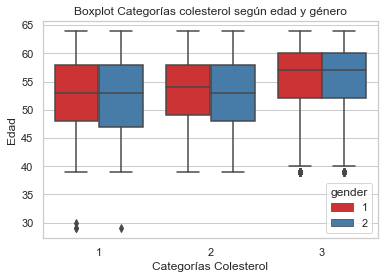

In [36]:
ax = sns.boxplot(x="cholesterol", y="AgeinYr", hue = 'gender', data=data, palette = "Set1")
plt.title("Boxplot Categorías colesterol según edad y género")
ax.set(ylabel="Edad")
ax.set(xlabel="Categorías Colesterol")
